<a href="https://colab.research.google.com/github/narennravi/Assignment_ML-Algorithms/blob/master/7.4__KNN_Assignment13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Social_Networks_Ads.csv

#-----------------------------------------------------------------------------

**Importing the libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

#-----------------------------------------------------------------------------

**Importing the dataset**

In [ ]:
df = pd.read_csv('/content/7.3__Social_Network_Ads.csv')

# Importing csv file from file_section - Colab

In [ ]:
df.head()

# First 5 data will displayed from df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
df.info()

# Checking for null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [ ]:
df.describe()

#Displays statistical information

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [ ]:
df.Purchased.value_counts()

# Purchased column - ratio will be identified

0    257
1    143
Name: Purchased, dtype: int64

#-----------------------------------------------------------------------------

**Splitting the dataset into the Training set and Test set**

In [ ]:
X = df[['Age','EstimatedSalary']]
Y = df['Purchased']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=5, stratify = Y)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(320, 2) (80, 2) (320,) (80,)


#-----------------------------------------------------------------------------

**Feature Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler
func = StandardScaler()
func.fit(x_train)
x_train_std = func.transform(x_train)
x_test_std = func.transform(x_test)

#-----------------------------------------------------------------------------

**Fitting K-NN to the Training set**

In [ ]:
num_neighbors = [1,2,3,4,5,6,7,8,9,10]
acc_results = []
for num in num_neighbors:
    model = KNeighborsClassifier(n_neighbors=num).fit(x_train_std, y_train)
    acc_results.append(accuracy_score(y_test, model.predict(x_test_std)))

In [ ]:
acc_results

[0.8, 0.85, 0.875, 0.9, 0.8625, 0.8875, 0.875, 0.875, 0.875, 0.875]

In [ ]:
np.array(acc_results).argmax()

3

#-----------------------------------------------------------------------------

**Predicting the Test set results**

In [ ]:
final_model = KNeighborsClassifier(n_neighbors=4).fit(x_train_std, y_train)
y_pred = final_model.predict(x_test_std)

#-----------------------------------------------------------------------------

**Making the Confusion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred) 

<AxesSubplot:>

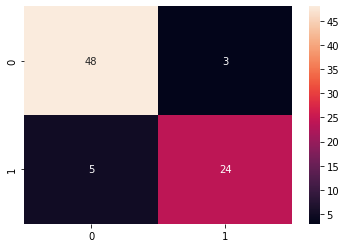

In [ ]:
sns.heatmap(cm, annot=True)

In [ ]:
accuracy_score(y_test,y_pred)

0.9